# IMPORT

In [1]:
%matplotlib notebook
from utils.setup import *

In [2]:
# Let`s import all packages that we may need:

import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.cross_validation import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

/usr/lib64/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/lib64/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# CREATION DATAFRAMES

In [53]:
train = pd.read_csv(TRAIN_MERGED, index_col=0)
test = pd.read_csv(TEST_MERGED, index_col=0)

train.index = pd.to_datetime(train.index)
test.index = pd.to_datetime(test.index)

train.drop('Pseudo rayonnement', axis=1, inplace=True)
test.drop('Pseudo rayonnement', axis=1, inplace=True)

# LSTM

In [54]:
RES_FEAT = ['Consommations totale (W)', 'Consommation résidentielle profilée (W)', 'Température réalisée lissée (°Celcius)', 'Consommation HTA totale (W)', 'RES1_BASE']

In [55]:
df.head()

,Consommations totale (W),Consommation résidentielle profilée (W),Température réalisée lissée (°Celcius),Consommation HTA totale (W),RES1_BASE
2013-10-13 00:00:00,3.908338e+10,2.199067e+10,11.1,9.474640e+09,1.046073
2013-10-13 00:30:00,3.900445e+10,2.162719e+10,11.1,9.460346e+09,0.967166
2013-10-13 01:00:00,3.768281e+10,1.989640e+10,11.1,9.689524e+09,0.858630
2013-10-13 01:30:00,3.524010e+10,1.766802e+10,11.1,9.619343e+09,0.752642
2013-10-13 02:00:00,3.437345e+10,1.726342e+10,11.1,9.479027e+09,0.705807


In [58]:
df.resample('H').mean()

,Consommations totale (W),Consommation résidentielle profilée (W),Température réalisée lissée (°Celcius),Consommation HTA totale (W),RES1_BASE
2013-10-13 00:00:00,3.904392e+10,2.180893e+10,11.10,9.467493e+09,1.006620
2013-10-13 01:00:00,3.646145e+10,1.878221e+10,11.10,9.654434e+09,0.805636
2013-10-13 02:00:00,3.407077e+10,1.716349e+10,11.10,9.435116e+09,0.683505
2013-10-13 03:00:00,3.232755e+10,1.599663e+10,11.20,9.313208e+09,0.622440
2013-10-13 04:00:00,2.967711e+10,1.345681e+10,11.20,9.303149e+09,0.609112
2013-10-13 05:00:00,2.847797e+10,1.211904e+10,11.30,9.432243e+09,0.612139
2013-10-13 06:00:00,2.885232e+10,1.195123e+10,11.35,9.807085e+09,0.637255
2013-10-13 07:00:00,3.007108e+10,1.246641e+10,11.45,1.006888e+10,0.703312
2013-10-13 08:00:00,3.098150e+10,1.283792e+10,11.65,1.024830e+10,0.856559
2013-10-13 09:00:00,3.262997e+10,1.418955e+10,12.00,1.037938e+10,1.092376


limit_output extension: Maximum message size of 10000 exceeded with 14474 characters

In [57]:
from sklearn.preprocessing import MinMaxScaler

df = pd.DataFrame(train[RES_FEAT].values, index=train.index.values, columns=[RES_FEAT])
values = df.values
values = values.astype('float32')
scaler = MinMaxScaler()
scaled = scaler.fit_transform(values)

n_train_time = 3*365*48
train = scaled[:n_train_time, :]
test = scaled[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 

(52560, 1, 4) (52560,) (15648, 1, 4) (15648,)


Train on 35040 samples, validate on 33168 samples
Epoch 1/20
 - 1s - loss: 0.0305 - val_loss: 0.0212
Epoch 2/20
 - 1s - loss: 0.0215 - val_loss: 0.0224
Epoch 3/20
 - 1s - loss: 0.0200 - val_loss: 0.0212
Epoch 4/20
 - 1s - loss: 0.0191 - val_loss: 0.0206
Epoch 5/20
 - 1s - loss: 0.0186 - val_loss: 0.0211
Epoch 6/20
 - 1s - loss: 0.0181 - val_loss: 0.0219
Epoch 7/20
 - 1s - loss: 0.0177 - val_loss: 0.0231
Epoch 8/20
 - 1s - loss: 0.0173 - val_loss: 0.0241
Epoch 9/20
 - 1s - loss: 0.0170 - val_loss: 0.0250
Epoch 10/20
 - 1s - loss: 0.0167 - val_loss: 0.0261
Epoch 11/20
 - 1s - loss: 0.0165 - val_loss: 0.0265
Epoch 12/20
 - 1s - loss: 0.0162 - val_loss: 0.0271
Epoch 13/20
 - 1s - loss: 0.0159 - val_loss: 0.0272
Epoch 14/20
 - 1s - loss: 0.0157 - val_loss: 0.0278
Epoch 15/20
 - 1s - loss: 0.0155 - val_loss: 0.0284
Epoch 16/20
 - 1s - loss: 0.0153 - val_loss: 0.0283
Epoch 17/20
 - 1s - loss: 0.0152 - val_loss: 0.0289
Epoch 18/20
 - 1s - loss: 0.0149 - val_loss: 0.0291
Epoch 19/20
 - 1s - los

<IPython.core.display.Javascript object>


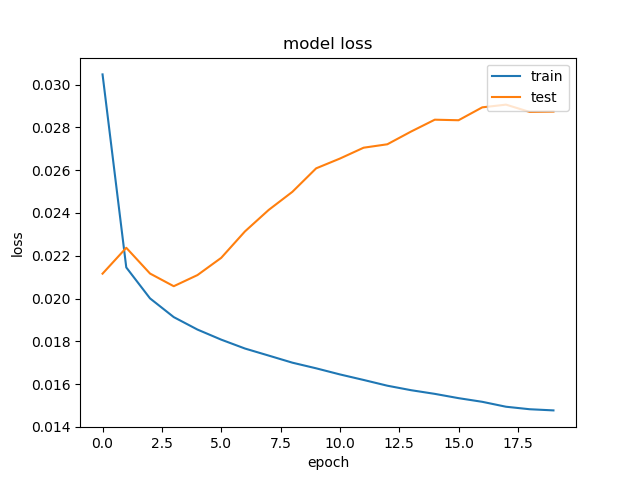

ValueError: operands could not be broadcast together with shapes (33168,4) (5,) (33168,4) 

In [46]:
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
#    model.add(LSTM(70))
#    model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=20, batch_size=70, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 4))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -3:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -3:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

/usr/lib64/python3.5/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/lib64/python3.5/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/usr/lib64/python3.5/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __nam

<IPython.core.display.Javascript object>


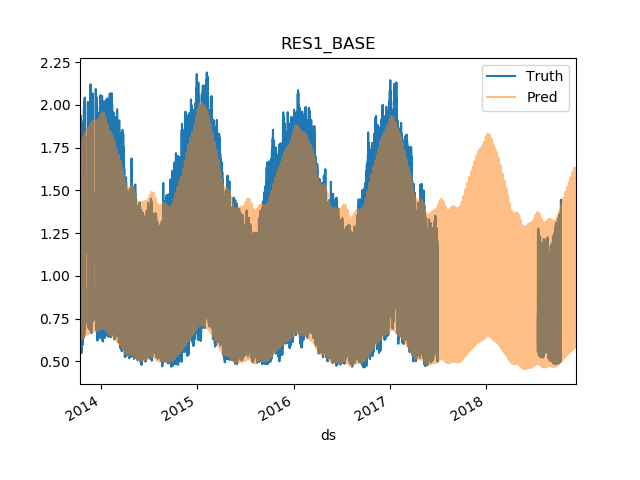

RMSE :  0.07672540682276172


/usr/lib64/python3.5/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/lib64/python3.5/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/usr/lib64/python3.5/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __nam

<IPython.core.display.Javascript object>


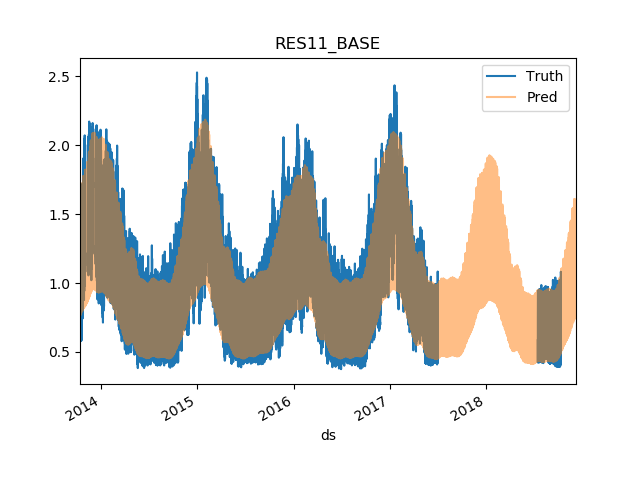

RMSE :  0.09422856974141737


/usr/lib64/python3.5/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/lib64/python3.5/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/usr/lib64/python3.5/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __nam

<IPython.core.display.Javascript object>


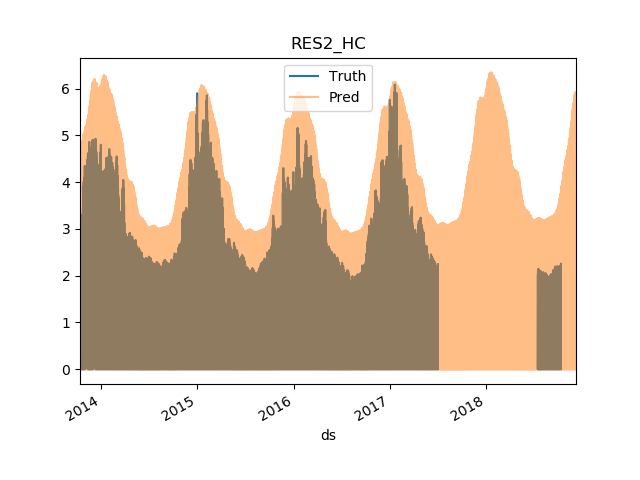

RMSE :  0.4625500883900796


/usr/lib64/python3.5/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/lib64/python3.5/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/usr/lib64/python3.5/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __nam

<IPython.core.display.Javascript object>


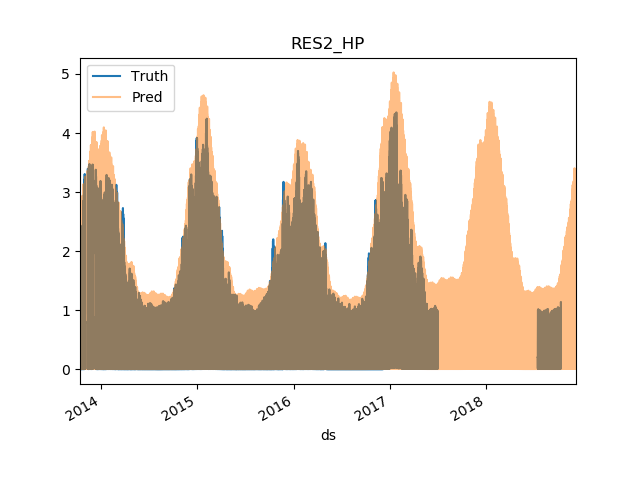

RMSE :  0.2495025117563186


/usr/lib64/python3.5/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/lib64/python3.5/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)
/usr/lib64/python3.5/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

limit_output extension: Maximum message size of 10000 exceeded with 10806 characters

In [7]:
for tar in TARGETS:    
    train, test = prophet_feature(train, test, tar)

In [14]:
train = train[~train['Injection RTE (W)'].isna()]
test = test[~test['Injection RTE (W)'].isna()]

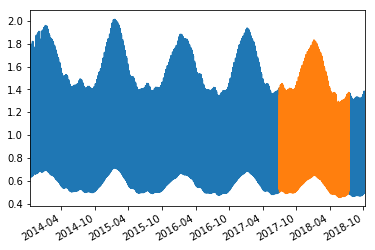

In [12]:
%matplotlib inline
plt.figure()
train['prophet_RES1_BASE'].plot()
test['prophet_RES1_BASE'].plot()
plt.show()

In [18]:
SAVE_PROPHET = True

In [19]:
if SAVE_PROPHET:
    pd.DataFrame.to_csv(train, 'train_prophet.csv')
    pd.DataFrame.to_csv(test, 'test_prophet.csv')

# Features Creation

In [22]:
def corr_drop(df,threshold, target, inf=0):
    
    df = df.copy()
    features = BASIC_FEAT.copy()
    features.append(target)
    df = df[features]
    corr_target = dict.fromkeys((features))
    to_drop = []
    
    for k in features:
        corr_target[k] = np.corrcoef(df[k],df[target])[0,1]
        if abs(corr_target[k])<inf:
            to_drop.append(k)
    
    for i in features:
        for j in features:
            if i !=j:
                if abs(np.corrcoef(df[i],df[j])[0,1])>threshold:
                    coefi, coefj = abs(corr_target[i]),abs(corr_target[j])
                    if coefi > coefj:
                        to_drop.append(j)
                    else:
                        to_drop.append(i)
                        
    to_drop = list(set(to_drop))
    print('Number of columns to drop : ',len(to_drop))
    print('Name of columns to drop :')
    for col in to_drop:
        print(col)
    return to_drop